# GOAL
Understand the distribuition of consumption time by set.
- Get consumption detailed information
- plot consumption graphs

# PACKAGES

In [1]:
import pandas as pd
from google.oauth2 import service_account
import pandas_gbq
import seaborn as sns

# PARAMETERS

In [2]:
project_id = "analytics-dev-308300"

credentials = service_account.Credentials.from_service_account_file(
    "../keys/gcp_key.json",
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

# FUNCTIONS

# DATA WRANGLING

In [3]:
query="""
SELECT * from dtm_engagement.ft_content_consumption
WHERE group_id=1818
"""

df=pd.read_gbq(query=query, credentials=credentials, project_id=project_id)
df['clipped_duration']=(df['consumption_duration'].clip(upper=600))
df['clipped_duration_m']=(df['consumption_duration'].clip(upper=600))/60
df['set_id_cards']=df['set_id'].astype('str')+ '('+df['cards'].astype('str')+')'

In [4]:
df.sample(5)

,group_id,user_id,sequence_id,set_id,set_tests,finished_tests,progress,cards,tests,started_at,completed_at,date_str,consumption_duration,clipped_duration,clipped_duration_m,set_id_cards
301,1818,20166,None,11717,0,0,0.0,6,0,NaT,NaT,2021-08-30,NaN,NaN,NaN,11717(6)
327,1818,20213,None,11724,1,0,0.0,15,1,NaT,NaT,2021-08-30,NaN,NaN,NaN,11724(15)
151,1818,20108,None,11401,2,0,0.0,18,2,NaT,NaT,2021-08-30,NaN,NaN,NaN,11401(18)
28,1818,20168,None,11508,1,1,100.0,22,1,2021-08-24 16:30:27+00:00,2021-08-24 16:35:43+00:00,2021-08-30,316.0,316.0,5.266667,11508(22)
119,1818,20137,None,11433,3,3,100.0,16,3,2021-08-16 12:29:28+00:00,2021-08-16 12:33:56+00:00,2021-08-30,268.0,268.0,4.466667,11433(16)


<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration_m'>

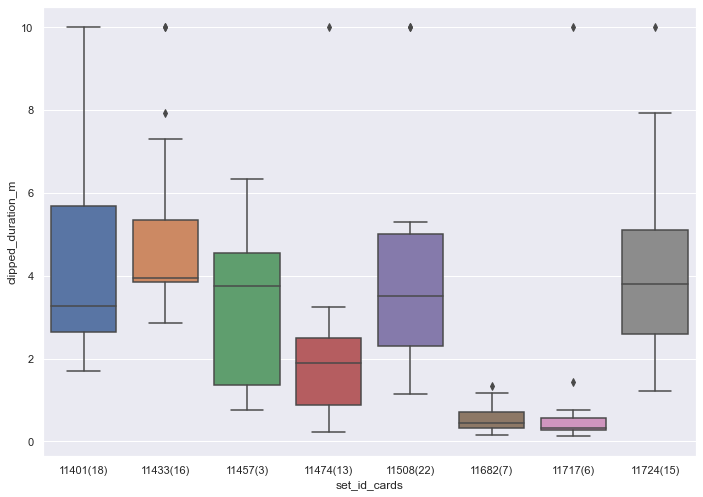

In [5]:
sns.boxplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration_m')

<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration_m'>

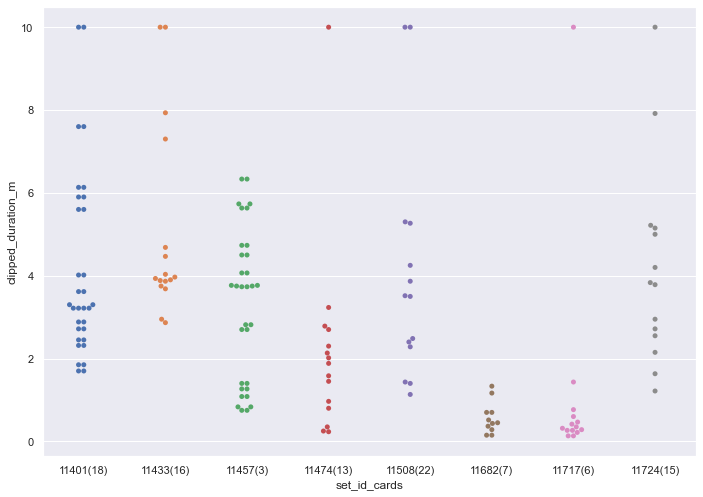

In [6]:
sns.swarmplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration_m')

<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration_m'>

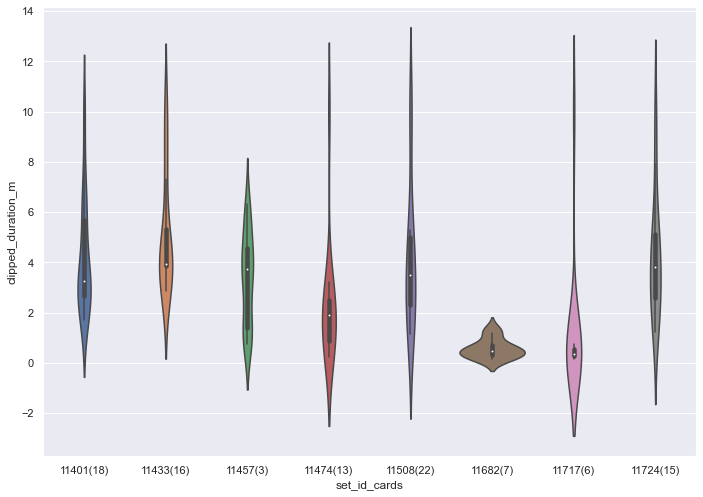

In [7]:
sns.violinplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration_m')

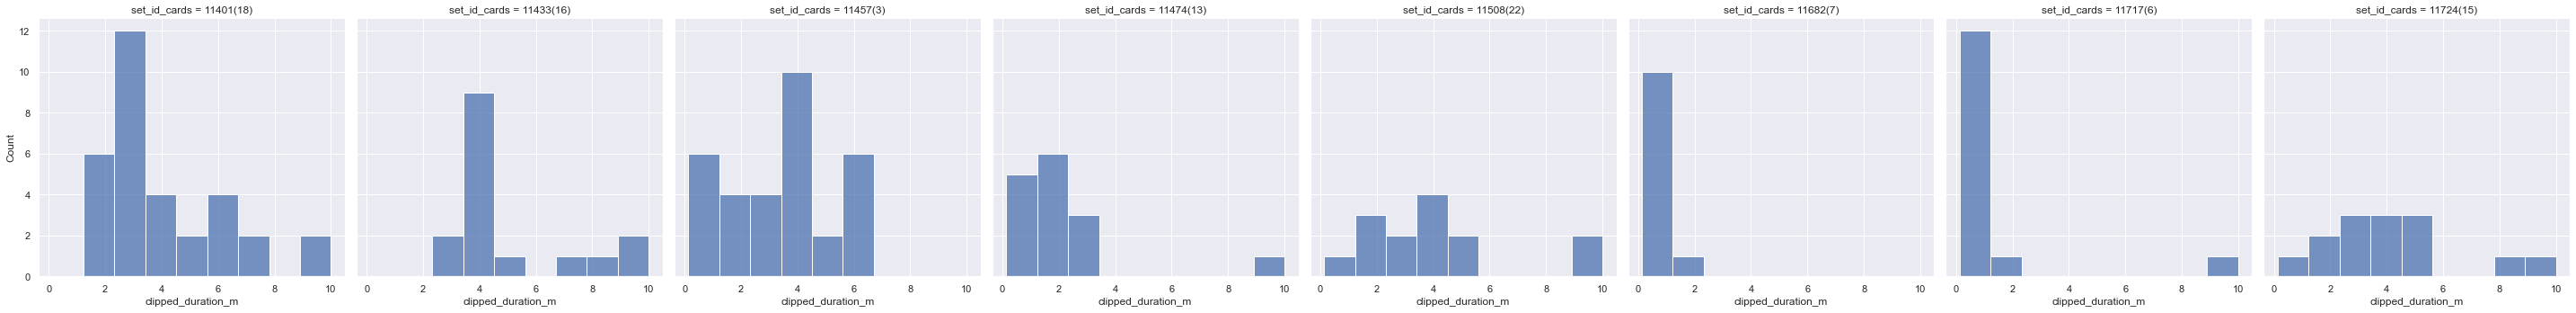

In [8]:
sns.displot(data=df.sort_values(by='set_id'),col='set_id_cards',x='clipped_duration_m')

In [9]:
df.pivot_table(values=['consumption_duration','clipped_duration'],index='set_id',aggfunc=['median','mean'],margins=True)

median                                  mean  \
       clipped_duration consumption_duration clipped_duration   
set_id                                                          
11401             195.5                195.5       249.437500   
11433             237.0                237.0       304.562500   
11457             224.5                224.5       199.125000   
11474             113.0                113.0       130.733333   
11508             210.5                210.5       243.571429   
11682              27.0                 27.0        34.090909   
11717              20.0                 20.0        67.071429   
11724             228.5                228.5       249.928571   
All               173.0                173.0       198.722973   

                             
       consumption_duration  
set_id                       
11401            332.125000  
11433            340.250000  
11457            199.125000  
11474            735.800000  
11508            277.857143  
11682             34.090909  
11717          10169.571429  
11724           1406.714286  
All             1350.094595